# 💡 Capital Asset Pricing Model (CAPM)

The CAPM explains how individual asset returns relate to overall market returns.

---

### 📐 CAPM Formula:

\[
E[R_i] = R_f + \beta_i \cdot (E[R_m] - R_f)
\]

Where:
- \( E[R_i] \): Expected return of asset \( i \)
- \( R_f \): Risk-free rate
- \( \beta_i \): Asset's beta (sensitivity to market)
- \( E[R_m] \): Expected return of the market
- \( E[R_m] - R_f \): Market risk premium

---

## 📊 Beta (β)

Beta measures how much an asset's returns move **relative to the market**:

- \( \beta = 1 \): Asset moves **with** the market
- \( \beta > 1 \): Asset is **more volatile** than the market
- \( \beta < 1 \): Asset is **less volatile**

Beta is estimated from linear regression:

\[
R_i = \alpha + \beta \cdot R_m + \epsilon
\]


Estimated beta: 1.18
Estimated alpha: -0.0005
Expected Return (CAPM): 9.25%


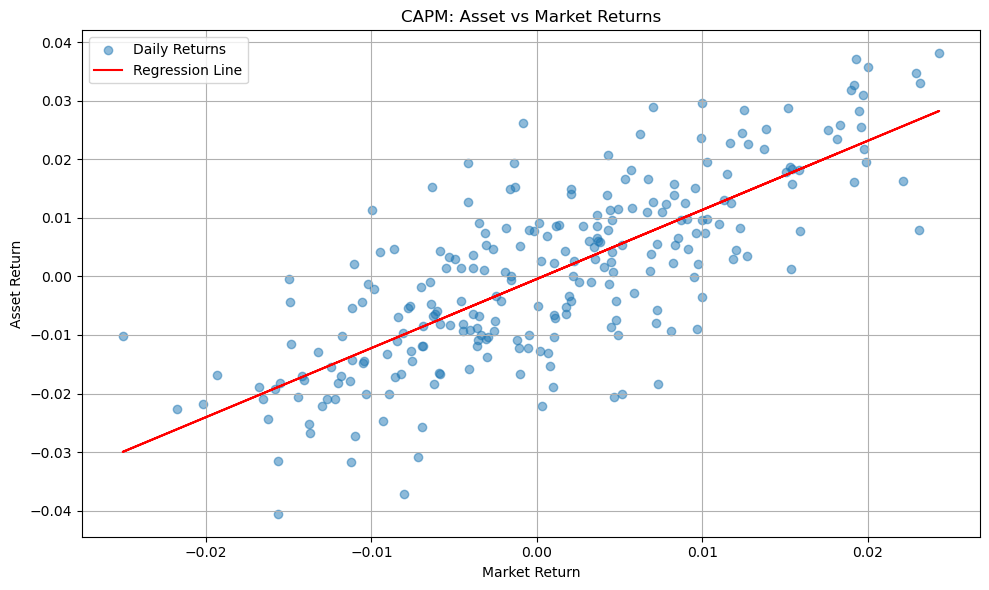

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Simulate returns: 252 days (1 year)
np.random.seed(0)
days = 252
market_returns = np.random.normal(0.0005, 0.01, days)   # market
stock_returns  = 0.0003 + 1.2 * market_returns + np.random.normal(0, 0.01, days)  # stock

# Calculate beta via regression
X = market_returns.reshape(-1, 1)
y = stock_returns
reg = LinearRegression().fit(X, y)
beta = reg.coef_[0]
alpha = reg.intercept_

# CAPM Expected Return
R_f = 0.01  # risk-free rate (1% annual)
E_Rm = 0.08  # expected market return (8% annual)
E_Ri = R_f + beta * (E_Rm - R_f)

# Output
print(f"Estimated beta: {beta:.2f}")
print(f"Estimated alpha: {alpha:.4f}")
print(f"Expected Return (CAPM): {E_Ri:.2%}")

# Scatter plot with regression line
plt.figure(figsize=(10,6))
plt.scatter(market_returns, stock_returns, alpha=0.5, label='Daily Returns')
plt.plot(market_returns, reg.predict(X), color='red', label='Regression Line')
plt.title('CAPM: Asset vs Market Returns')
plt.xlabel('Market Return')
plt.ylabel('Asset Return')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
